# Steps

Skipped 0       2854
1       2854
2       2854
3       2854
4       2854
        ... 
2323    2854
2324    2854
2325    2854
2326    2854
2327    2854
Name: participant_id, Length: 2328, dtype: object
Skipped 0     4063
1     4063
2     4063
3     4063
4     4063
5     4063
6     4063
7     4063
8     4063
9     4063
10    4063
11    4063
12    4063
13    4063
14    4063
15    4063
16    4063
17    4063
18    4063
19    4063
20    4063
21    4063
22    4063
23    4063
24    4063
25    4063
26    4063
27    4063
28    4063
29    4063
30    4063
31    4063
32    4063
33    4063
34    4063
35    4063
36    4063
37    4063
38    4063
39    4063
40    4063
Name: participant_id, dtype: object
Optimal number of clusters: 2


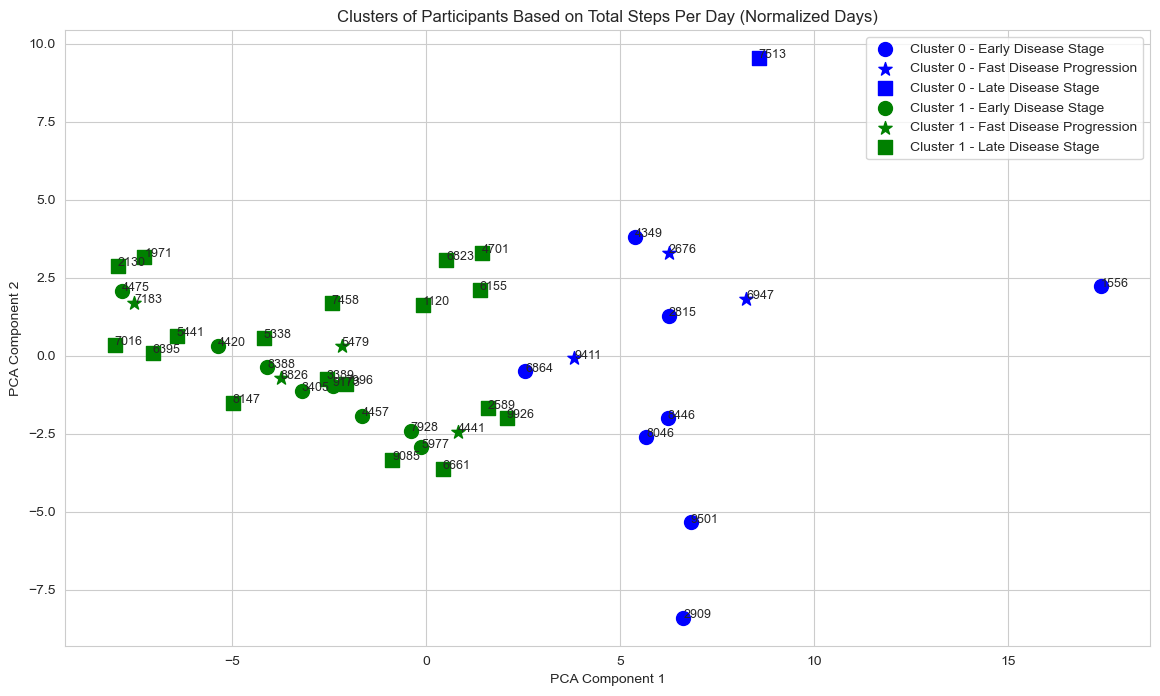

In [1]:
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Data Cleaning:
# Too short: 4063
# Too long: 2854

skip_participant = [4063, 2854]

# Path to your directory containing the CSV files
path = './Hourly Sensor Data/'  # Update this with your actual directory path

# Read all CSV files
all_files = glob.glob(path + "RHourly_*.csv")

# List to hold dataframes
data_frames = []

# Read each file and append to the list
for filename in all_files:
    df = pd.read_csv(filename)
    df['participant_id'] = filename.split('_')[-1].split('.')[0]  # Extract participant ID from filename
    
    if int(filename.split('_')[-1].split('.')[0]) in skip_participant:
        print(f"Skipped {df['participant_id']}")
        continue
    
    df['time'] = pd.to_datetime(df['time'])
    data_frames.append(df)

# Concatenate all dataframes
combined_df = pd.concat(data_frames, ignore_index=True)

# Extract date from time
combined_df['date'] = combined_df['time'].dt.date

# Calculate the minimum date for each participant
combined_df['day_from_start'] = combined_df.groupby('participant_id')['date'].transform(lambda x: (x - x.min()).dt.days)

# Create a pivot table with participants as rows and days from start as columns (total steps per normalized day)
pivot_table = combined_df.pivot_table(index='participant_id', columns='day_from_start', values='steps', aggfunc='sum', fill_value=0)

# Load the overview_df and merge with pivot_table to get disease_type
overview_df = pd.read_csv('ClinicalMarkers_final.csv')
overview_df['participant_id'] = overview_df['Id'].astype(str)
merged_df = pivot_table.join(overview_df.set_index('participant_id')['disease_type'], how='left')

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_df.drop(columns='disease_type'))

# Determine the number of clusters (e.g., using the silhouette score or the elbow method)
# Here we use the silhouette score to determine the optimal number of clusters
silhouette_scores = []
range_n_clusters = list(range(2, 11))
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Choose the number of clusters with the highest silhouette score
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_n_clusters}')

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the merged_df
merged_df['cluster'] = cluster_labels

# Plotting the clusters
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(14, 8))

# Define markers for each disease type
markers = {'Early Disease Stage': 'o', 'Fast Disease Progression': '*', 'Late Disease Stage': 's'}
colors = {0: 'b', 1: 'g', 2: 'r', 3: 'c', 4: 'm', 5: 'y', 6: 'k'}

# Plot each cluster with different markers for disease types
for i in range(optimal_n_clusters):
    for disease_type, marker in markers.items():
        cluster_data = reduced_data[(cluster_labels == i) & (merged_df['disease_type'] == disease_type).values]
        participant_ids = merged_df.index[(cluster_labels == i) & (merged_df['disease_type'] == disease_type).values]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i} - {disease_type}', marker=marker, color=colors[i], s=100)
        # Annotate each point with the participant_id
        for j, participant_id in enumerate(participant_ids):
            plt.annotate(participant_id, (cluster_data[j, 0], cluster_data[j, 1]), fontsize=9)

plt.title('Clusters of Participants Based on Total Steps Per Day (Normalized Days)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


# Sleep

Skipped 0       2854
1       2854
2       2854
3       2854
4       2854
        ... 
2323    2854
2324    2854
2325    2854
2326    2854
2327    2854
Name: participant_id, Length: 2328, dtype: object
Skipped 0     4063
1     4063
2     4063
3     4063
4     4063
5     4063
6     4063
7     4063
8     4063
9     4063
10    4063
11    4063
12    4063
13    4063
14    4063
15    4063
16    4063
17    4063
18    4063
19    4063
20    4063
21    4063
22    4063
23    4063
24    4063
25    4063
26    4063
27    4063
28    4063
29    4063
30    4063
31    4063
32    4063
33    4063
34    4063
35    4063
36    4063
37    4063
38    4063
39    4063
40    4063
Name: participant_id, dtype: object
Optimal number of clusters: 2


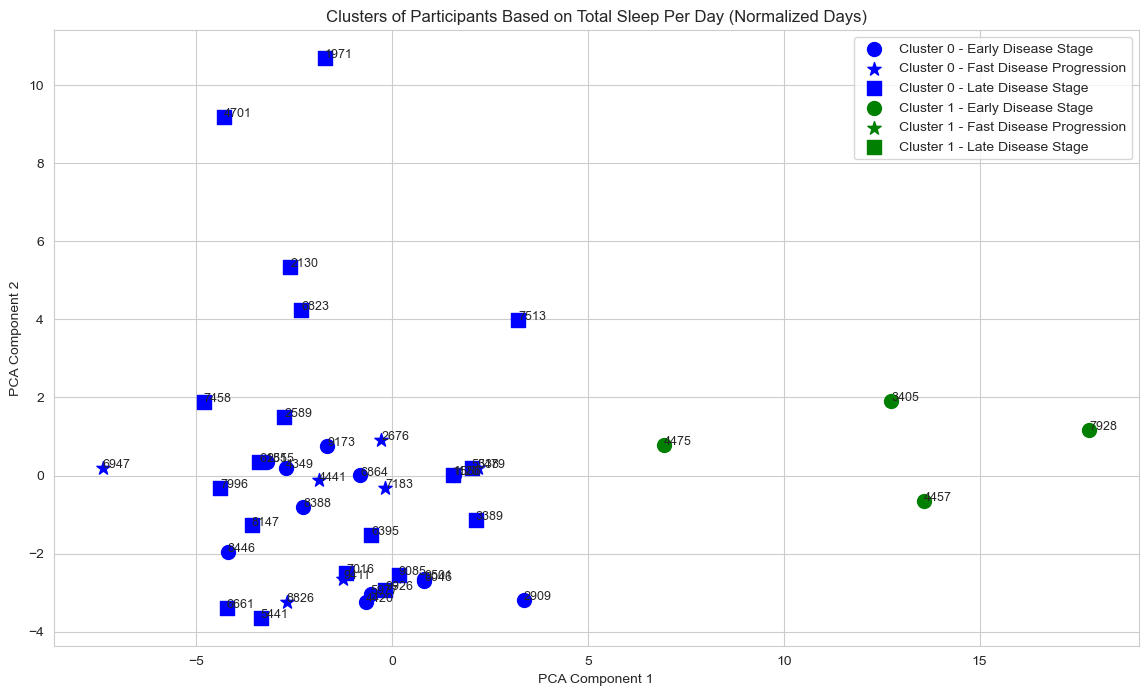

In [3]:
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Data Cleaning:
# Too short: 4063
# Too long: 2854

skip_participant = [4063, 2854]

# Path to your directory containing the CSV files
path = './Hourly Sensor Data/'  # Update this with your actual directory path

# Read all CSV files
all_files = glob.glob(path + "RHourly_*.csv")

# List to hold dataframes
data_frames = []

# Read each file and append to the list
for filename in all_files:
    df = pd.read_csv(filename)
    df['participant_id'] = filename.split('_')[-1].split('.')[0]  # Extract participant ID from filename
    
    if int(filename.split('_')[-1].split('.')[0]) in skip_participant:
        print(f"Skipped {df['participant_id']}")
        continue
    
    df['time'] = pd.to_datetime(df['time'])
    data_frames.append(df)

# Concatenate all dataframes
combined_df = pd.concat(data_frames, ignore_index=True)

# Extract date from time
combined_df['date'] = combined_df['time'].dt.date

# Calculate the minimum date for each participant
combined_df['day_from_start'] = combined_df.groupby('participant_id')['date'].transform(lambda x: (x - x.min()).dt.days)

# Create a pivot table with participants as rows and days from start as columns (total sleep per normalized day)
pivot_table = combined_df.pivot_table(index='participant_id', columns='day_from_start', values='sleep', aggfunc='sum', fill_value=0)

# Load the overview_df and merge with pivot_table to get disease_type
overview_df = pd.read_csv('ClinicalMarkers_final.csv')
overview_df['participant_id'] = overview_df['Id'].astype(str)
merged_df = pivot_table.join(overview_df.set_index('participant_id')['disease_type'], how='left')

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_df.drop(columns='disease_type'))

# Determine the number of clusters (e.g., using the silhouette score or the elbow method)
# Here we use the silhouette score to determine the optimal number of clusters
silhouette_scores = []
range_n_clusters = list(range(2, 11))
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Choose the number of clusters with the highest silhouette score
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_n_clusters}')

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the merged_df
merged_df['cluster'] = cluster_labels

# Plotting the clusters
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(14, 8))

# Define markers for each disease type
markers = {'Early Disease Stage': 'o', 'Fast Disease Progression': '*', 'Late Disease Stage': 's'}
colors = {0: 'b', 1: 'g', 2: 'r', 3: 'c', 4: 'm', 5: 'y', 6: 'k'}

# Plot each cluster with different markers for disease types
for i in range(optimal_n_clusters):
    for disease_type, marker in markers.items():
        cluster_data = reduced_data[(cluster_labels == i) & (merged_df['disease_type'] == disease_type).values]
        participant_ids = merged_df.index[(cluster_labels == i) & (merged_df['disease_type'] == disease_type).values]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i} - {disease_type}', marker=marker, color=colors[i], s=100)
        # Annotate each point with the participant_id
        for j, participant_id in enumerate(participant_ids):
            plt.annotate(participant_id, (cluster_data[j, 0], cluster_data[j, 1]), fontsize=9)

plt.title('Clusters of Participants Based on Total Sleep Per Day (Normalized Days)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


# Heartrate

Skipped 0       2854
1       2854
2       2854
3       2854
4       2854
        ... 
2323    2854
2324    2854
2325    2854
2326    2854
2327    2854
Name: participant_id, Length: 2328, dtype: object
Skipped 0     4063
1     4063
2     4063
3     4063
4     4063
5     4063
6     4063
7     4063
8     4063
9     4063
10    4063
11    4063
12    4063
13    4063
14    4063
15    4063
16    4063
17    4063
18    4063
19    4063
20    4063
21    4063
22    4063
23    4063
24    4063
25    4063
26    4063
27    4063
28    4063
29    4063
30    4063
31    4063
32    4063
33    4063
34    4063
35    4063
36    4063
37    4063
38    4063
39    4063
40    4063
Name: participant_id, dtype: object
Optimal number of clusters: 2


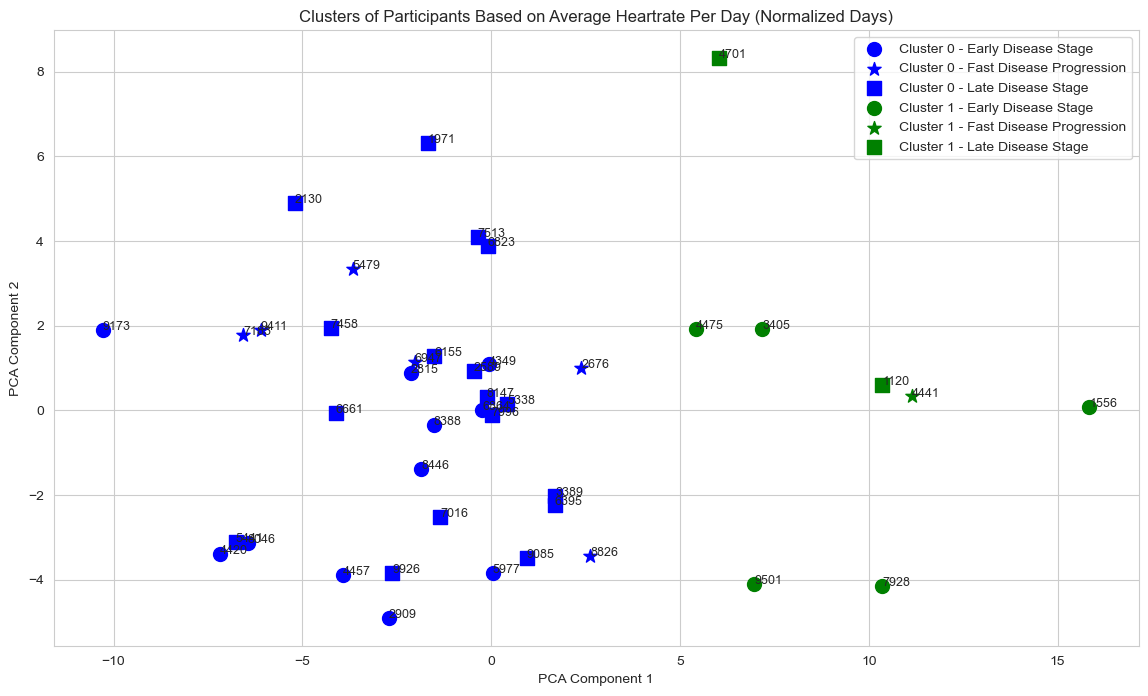

In [5]:
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Data Cleaning:
# Too short: 4063
# Too long: 2854

skip_participant = [4063, 2854]

# Path to your directory containing the CSV files
path = './Hourly Sensor Data/'  # Update this with your actual directory path

# Read all CSV files
all_files = glob.glob(path + "RHourly_*.csv")

# List to hold dataframes
data_frames = []

# Read each file and append to the list
for filename in all_files:
    df = pd.read_csv(filename)
    df['participant_id'] = filename.split('_')[-1].split('.')[0]  # Extract participant ID from filename
    
    if int(filename.split('_')[-1].split('.')[0]) in skip_participant:
        print(f"Skipped {df['participant_id']}")
        continue
    
    df['time'] = pd.to_datetime(df['time'])
    data_frames.append(df)

# Concatenate all dataframes
combined_df = pd.concat(data_frames, ignore_index=True)

# Extract date from time
combined_df['date'] = combined_df['time'].dt.date

# Calculate the minimum date for each participant
combined_df['day_from_start'] = combined_df.groupby('participant_id')['date'].transform(lambda x: (x - x.min()).dt.days)

# Create a pivot table with participants as rows and days from start as columns (total heartrate per normalized day)
pivot_table = combined_df.pivot_table(index='participant_id', columns='day_from_start', values='heartrate', aggfunc='mean', fill_value=0)

# Load the overview_df and merge with pivot_table to get disease_type
overview_df = pd.read_csv('ClinicalMarkers_final.csv')
overview_df['participant_id'] = overview_df['Id'].astype(str)
merged_df = pivot_table.join(overview_df.set_index('participant_id')['disease_type'], how='left')

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_df.drop(columns='disease_type'))

# Determine the number of clusters (e.g., using the silhouette score or the elbow method)
# Here we use the silhouette score to determine the optimal number of clusters
silhouette_scores = []
range_n_clusters = list(range(2, 11))
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Choose the number of clusters with the highest silhouette score
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_n_clusters}')

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the merged_df
merged_df['cluster'] = cluster_labels

# Plotting the clusters
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(14, 8))

# Define markers for each disease type
markers = {'Early Disease Stage': 'o', 'Fast Disease Progression': '*', 'Late Disease Stage': 's'}
colors = {0: 'b', 1: 'g', 2: 'r', 3: 'c', 4: 'm', 5: 'y', 6: 'k'}

# Plot each cluster with different markers for disease types
for i in range(optimal_n_clusters):
    for disease_type, marker in markers.items():
        cluster_data = reduced_data[(cluster_labels == i) & (merged_df['disease_type'] == disease_type).values]
        participant_ids = merged_df.index[(cluster_labels == i) & (merged_df['disease_type'] == disease_type).values]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i} - {disease_type}', marker=marker, color=colors[i], s=100)
        # Annotate each point with the participant_id
        for j, participant_id in enumerate(participant_ids):
            plt.annotate(participant_id, (cluster_data[j, 0], cluster_data[j, 1]), fontsize=9)

plt.title('Clusters of Participants Based on Average Heartrate Per Day (Normalized Days)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


Skipped 0       2854
1       2854
2       2854
3       2854
4       2854
        ... 
2323    2854
2324    2854
2325    2854
2326    2854
2327    2854
Name: participant_id, Length: 2328, dtype: object
Skipped 0     4063
1     4063
2     4063
3     4063
4     4063
5     4063
6     4063
7     4063
8     4063
9     4063
10    4063
11    4063
12    4063
13    4063
14    4063
15    4063
16    4063
17    4063
18    4063
19    4063
20    4063
21    4063
22    4063
23    4063
24    4063
25    4063
26    4063
27    4063
28    4063
29    4063
30    4063
31    4063
32    4063
33    4063
34    4063
35    4063
36    4063
37    4063
38    4063
39    4063
40    4063
Name: participant_id, dtype: object
Data distribution summary:
               0           1           2           3           4           5   \
count   42.000000   42.000000   42.000000   42.000000   42.000000   42.000000   
mean    75.056300   78.445130   80.333596   79.666815   79.065476   78.906759   
std     25.876262   15.637890    9

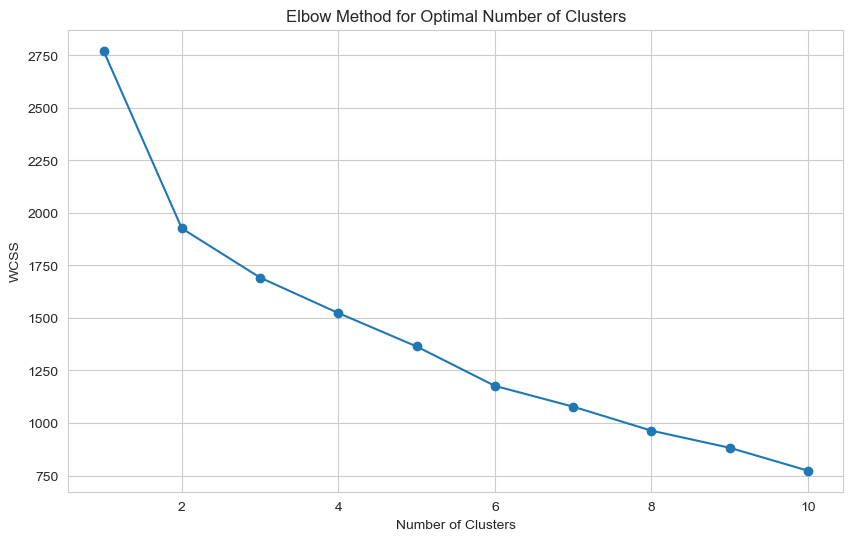

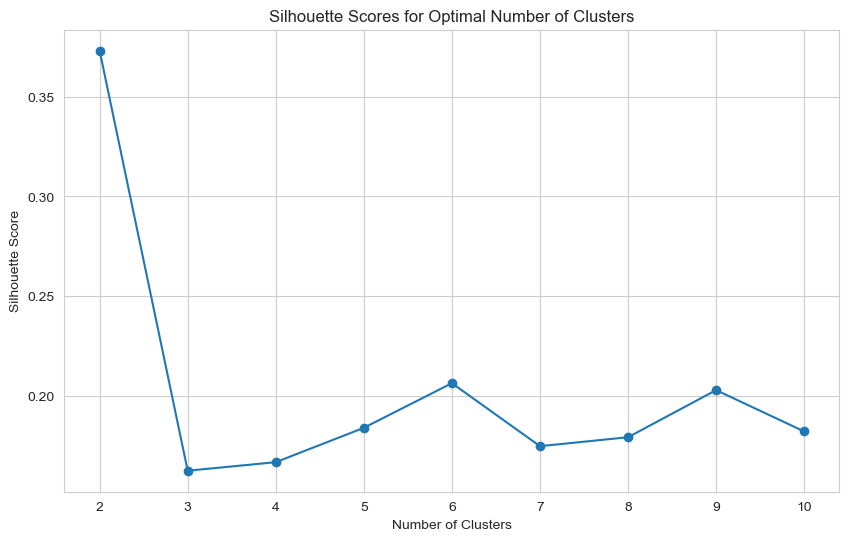

Optimal number of clusters: 2


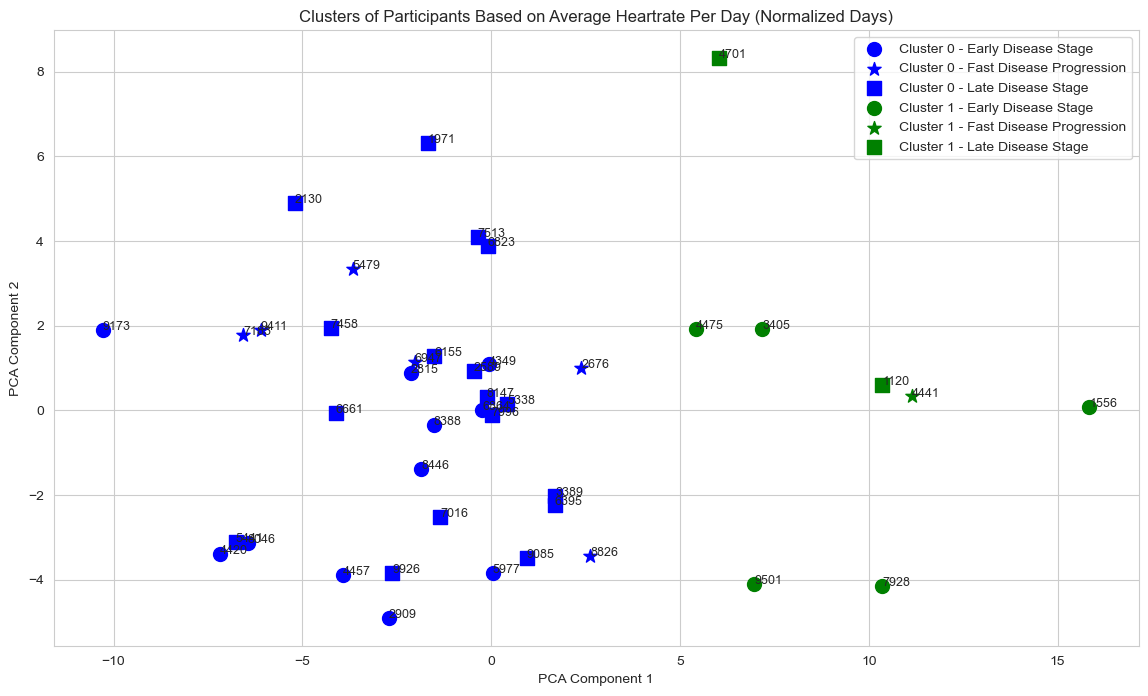

In [7]:
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Data Cleaning:
# Too short: 4063
# Too long: 2854

skip_participant = [4063, 2854]

# Path to your directory containing the CSV files
path = './Hourly Sensor Data/'  # Update this with your actual directory path

# Read all CSV files
all_files = glob.glob(path + "RHourly_*.csv")

# List to hold dataframes
data_frames = []

# Read each file and append to the list
for filename in all_files:
    df = pd.read_csv(filename)
    df['participant_id'] = filename.split('_')[-1].split('.')[0]  # Extract participant ID from filename
    
    if int(filename.split('_')[-1].split('.')[0]) in skip_participant:
        print(f"Skipped {df['participant_id']}")
        continue
    
    df['time'] = pd.to_datetime(df['time'])
    data_frames.append(df)

# Concatenate all dataframes
combined_df = pd.concat(data_frames, ignore_index=True)

# Extract date from time
combined_df['date'] = combined_df['time'].dt.date

# Calculate the minimum date for each participant
combined_df['day_from_start'] = combined_df.groupby('participant_id')['date'].transform(lambda x: (x - x.min()).dt.days)

# Create a pivot table with participants as rows and days from start as columns (average heartrate per normalized day)
pivot_table = combined_df.pivot_table(index='participant_id', columns='day_from_start', values='heartrate', aggfunc='mean', fill_value=0)

# Load the overview_df and merge with pivot_table to get disease_type
overview_df = pd.read_csv('ClinicalMarkers_final.csv')
overview_df['participant_id'] = overview_df['Id'].astype(str)
merged_df = pivot_table.join(overview_df.set_index('participant_id')['disease_type'], how='left')

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_df.drop(columns='disease_type'))

# Check data distribution
print("Data distribution summary:")
print(merged_df.describe())

# Determine the optimal number of clusters using the elbow method
wcss = []
range_n_clusters = list(range(1, 11))
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Use silhouette scores to confirm optimal number of clusters
silhouette_scores = []
range_n_clusters = list(range(2, 11))
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the number of clusters with the highest silhouette score
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_n_clusters}')

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the merged_df
merged_df['cluster'] = cluster_labels

# Plotting the clusters
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(14, 8))

# Define markers for each disease type
markers = {'Early Disease Stage': 'o', 'Fast Disease Progression': '*', 'Late Disease Stage': 's'}
colors = {i: color for i, color in enumerate(['b', 'g', 'r', 'c', 'm', 'y', 'k'])}

# Plot each cluster with different markers for disease types
for i in range(optimal_n_clusters):
    for disease_type, marker in markers.items():
        cluster_data = reduced_data[(cluster_labels == i) & (merged_df['disease_type'] == disease_type).values]
        participant_ids = merged_df.index[(cluster_labels == i) & (merged_df['disease_type'] == disease_type).values]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i} - {disease_type}', marker=marker, color=colors[i], s=100)
        # Annotate each point with the participant_id
        for j, participant_id in enumerate(participant_ids):
            plt.annotate(participant_id, (cluster_data[j, 0], cluster_data[j, 1]), fontsize=9)

plt.title('Clusters of Participants Based on Average Heartrate Per Day (Normalized Days)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [8]:
pivot_table

day_from_start,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
participant_id,,,,,,,,,,,,,,,,,,,,,
1120,90.819585,92.041697,92.094506,93.197412,92.834636,91.376630,94.030321,97.191790,97.254697,99.512739,...,93.085227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1556,104.788425,108.691853,104.878133,103.160571,101.242540,102.605430,100.478878,101.416519,99.936176,98.062207,...,99.227944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1971,73.214530,75.936220,74.639559,77.929538,76.043738,76.792963,75.995873,76.733257,78.880012,78.033474,...,67.518649,68.379580,68.470835,71.847562,70.620507,72.665108,70.071288,70.705710,70.964534,68.656579
2130,81.024269,72.117941,79.549455,71.716149,71.417773,73.177575,67.815438,62.950114,68.777142,72.362887,...,66.610830,80.841349,69.197732,73.911562,67.333755,72.227723,74.844618,0.000000,0.000000,0.000000
2589,79.531042,76.326054,76.180654,74.510301,81.878365,74.893537,81.956503,78.482502,79.501414,78.882241,...,72.402151,69.930882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2676,0.000000,86.437853,87.961976,90.813935,94.104473,90.134089,80.998588,80.923255,86.306871,81.789919,...,80.823364,76.908160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2815,83.033143,75.325953,72.968536,75.658840,76.353476,73.972714,74.721991,78.524380,72.853316,72.638147,...,73.063514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2909,81.651090,78.502193,82.893564,80.440339,77.809935,78.449158,79.150203,80.858946,77.923943,76.461129,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3389,94.050924,85.248746,79.601963,83.486726,81.398030,81.454784,82.064062,80.994169,81.602312,78.447074,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Combined representation of steps + sleep + hearrate

Skipped 0       2854
1       2854
2       2854
3       2854
4       2854
        ... 
2323    2854
2324    2854
2325    2854
2326    2854
2327    2854
Name: participant_id, Length: 2328, dtype: object
Skipped 0     4063
1     4063
2     4063
3     4063
4     4063
5     4063
6     4063
7     4063
8     4063
9     4063
10    4063
11    4063
12    4063
13    4063
14    4063
15    4063
16    4063
17    4063
18    4063
19    4063
20    4063
21    4063
22    4063
23    4063
24    4063
25    4063
26    4063
27    4063
28    4063
29    4063
30    4063
31    4063
32    4063
33    4063
34    4063
35    4063
36    4063
37    4063
38    4063
39    4063
40    4063
Name: participant_id, dtype: object
Optimal number of clusters: 2


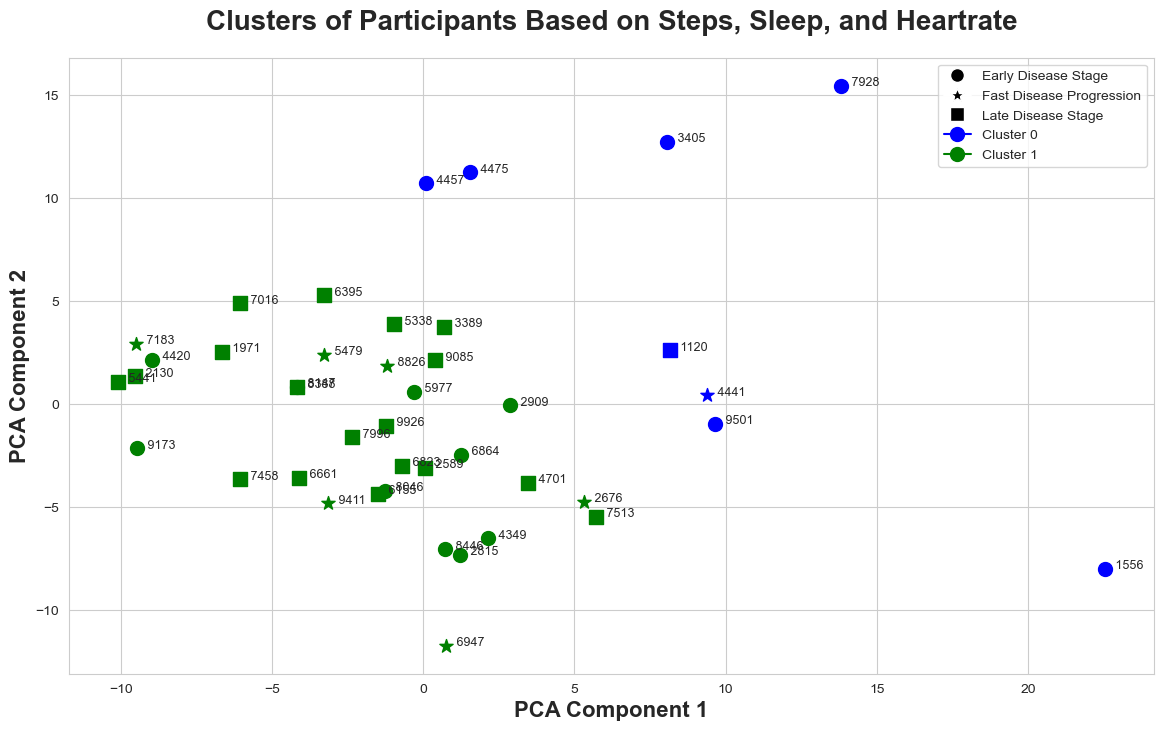

In [11]:
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from matplotlib.lines import Line2D

# Data Cleaning:
# Too short: 4063
# Too long: 2854

skip_participant = [4063, 2854]

# Path to your directory containing the CSV files
path = './Hourly Sensor Data/'  # Update this with your actual directory path

# Read all CSV files
all_files = glob.glob(path + "RHourly_*.csv")

# List to hold dataframes
data_frames = []

# Read each file and append to the list
for filename in all_files:
    df = pd.read_csv(filename)
    df['participant_id'] = filename.split('_')[-1].split('.')[0]  # Extract participant ID from filename
    
    if int(filename.split('_')[-1].split('.')[0]) in skip_participant:
        print(f"Skipped {df['participant_id']}")
        continue
    
    df['time'] = pd.to_datetime(df['time'])
    data_frames.append(df)

# Concatenate all dataframes
combined_df = pd.concat(data_frames, ignore_index=True)

# Extract date from time
combined_df['date'] = combined_df['time'].dt.date

# Calculate the minimum date for each participant
combined_df['day_from_start'] = combined_df.groupby('participant_id')['date'].transform(lambda x: (x - x.min()).dt.days)

# Create pivot tables for steps, sleep, and heartrate with participants as rows and days from start as columns
pivot_steps = combined_df.pivot_table(index='participant_id', columns='day_from_start', values='steps', aggfunc='sum', fill_value=0)
pivot_sleep = combined_df.pivot_table(index='participant_id', columns='day_from_start', values='sleep', aggfunc='sum', fill_value=0)
pivot_heartrate = combined_df.pivot_table(index='participant_id', columns='day_from_start', values='heartrate', aggfunc='mean', fill_value=0)

# Combine the pivot tables into a single DataFrame
combined_pivot = pivot_steps.add_suffix('_steps').join([pivot_sleep.add_suffix('_sleep'), pivot_heartrate.add_suffix('_heartrate')])

# Load the overview_df and merge with combined_pivot to get disease_type
overview_df = pd.read_csv('ClinicalMarkers_final.csv')
overview_df['participant_id'] = overview_df['Id'].astype(str)
merged_df = combined_pivot.join(overview_df.set_index('participant_id')['disease_type'], how='left')

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_df.drop(columns='disease_type'))

# Determine the optimal number of clusters using the elbow method
wcss = []
range_n_clusters = list(range(1, 11))
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Use silhouette scores to confirm optimal number of clusters
silhouette_scores = []
range_n_clusters = list(range(2, 11))
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Choose the number of clusters with the highest silhouette score
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_n_clusters}')

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the merged_df
merged_df['cluster'] = cluster_labels

# Plotting the clusters
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(14, 8))

# Define markers for each disease type
markers = {'Early Disease Stage': 'o', 'Fast Disease Progression': '*', 'Late Disease Stage': 's'}
colors = {0: 'b', 1: 'g'}  # Use two colors for two clusters

# Plot each cluster with different markers for disease types
for i in range(optimal_n_clusters):
    for disease_type, marker in markers.items():
        cluster_data = reduced_data[(cluster_labels == i) & (merged_df['disease_type'] == disease_type).values]
        participant_ids = merged_df.index[(cluster_labels == i) & (merged_df['disease_type'] == disease_type).values]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i} - {disease_type}', marker=marker, color=colors[i], s=100)
        # Annotate each point with the participant_id
        for j, participant_id in enumerate(participant_ids):
            plt.annotate("   "+participant_id, (cluster_data[j, 0], cluster_data[j, 1]), fontsize=9)

# Custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Early Disease Stage', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='*', color='w', label='Fast Disease Progression', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='Late Disease Stage', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='o', color='b', label='Cluster 0', markersize=10),
                   Line2D([0], [0], marker='o', color='g', label='Cluster 1', markersize=10)]

plt.legend(handles=legend_elements, loc='best')
plt.title('Clusters of Participants Based on Steps, Sleep, and Heartrate', fontsize=20, weight='bold', pad=20)
plt.xlabel('PCA Component 1', fontsize=16, weight='bold')
plt.ylabel('PCA Component 2', fontsize=16, weight='bold')
plt.show()


# Autoencoder

In [17]:
import pandas as pd
import numpy as np
import glob

# Data Cleaning:
# Too short: 4063
# Too long: 2854

skip_participant = [4063, 2854]

# Path to your directory containing the CSV files
path = './Hourly Sensor Data/'  # Update this with your actual directory path

# Read all CSV files
all_files = glob.glob(path + "RHourly_*.csv")

# List to hold dataframes
data_frames = []

# Read each file and append to the list
for filename in all_files:
    df = pd.read_csv(filename)
    df['participant_id'] = filename.split('_')[-1].split('.')[0]  # Extract participant ID from filename
    
    if int(filename.split('_')[-1].split('.')[0]) in skip_participant:
        print(f"Skipped {df['participant_id']}")
        continue
    
    df['time'] = pd.to_datetime(df['time'])
    df['hour'] = df['time'].dt.hour
    data_frames.append(df)

# Concatenate all dataframes
combined_df = pd.concat(data_frames, ignore_index=True)

# Extract relevant columns and pivot to create hourly data matrix for each participant
combined_df['date'] = combined_df['time'].dt.date
hourly_data = combined_df.pivot_table(index=['participant_id', 'date', 'hour'], 
                                      values=['steps', 'sleep', 'heartrate'], 
                                      aggfunc='mean').reset_index()

# Debugging: Check the structure of hourly_data
print(hourly_data.head())

# Determine the maximum number of hours for any participant
max_hours = hourly_data.groupby('participant_id').size().max()

# Create a list of participant embeddings with padding
participants = hourly_data['participant_id'].unique()
embeddings = []

for participant in participants:
    participant_data = hourly_data[hourly_data['participant_id'] == participant]
    pivot_data = participant_data.pivot(index='hour', columns='date', values=['steps', 'sleep', 'heartrate'])
    pivot_data = pivot_data.fillna(0).values.flatten()  # Flatten to a single vector
    padded_data = np.pad(pivot_data, (0, max_hours * 3 - len(pivot_data)), 'constant')  # Pad to max_hours * 3
    embeddings.append(padded_data)

embeddings = np.array(embeddings)

# Debugging: Check the shape and content of embeddings
print(f"Embeddings shape: {embeddings.shape}")
print(embeddings)


Skipped 0       2854
1       2854
2       2854
3       2854
4       2854
        ... 
2323    2854
2324    2854
2325    2854
2326    2854
2327    2854
Name: participant_id, Length: 2328, dtype: object
Skipped 0     4063
1     4063
2     4063
3     4063
4     4063
5     4063
6     4063
7     4063
8     4063
9     4063
10    4063
11    4063
12    4063
13    4063
14    4063
15    4063
16    4063
17    4063
18    4063
19    4063
20    4063
21    4063
22    4063
23    4063
24    4063
25    4063
26    4063
27    4063
28    4063
29    4063
30    4063
31    4063
32    4063
33    4063
34    4063
35    4063
36    4063
37    4063
38    4063
39    4063
40    4063
Name: participant_id, dtype: object
  participant_id        date  hour  heartrate  sleep  steps
0           1120  2021-06-08     0        NaN      0    0.0
1           1120  2021-06-08     1        NaN      0    0.0
2           1120  2021-06-08     2        NaN      0    0.0
3           1120  2021-06-08     3        NaN      0    0.0
4   

In [18]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Check if embeddings array is correctly shaped
if len(embeddings) == 0 or embeddings.shape[1] == 0:
    raise ValueError("Embeddings array is empty or improperly shaped")

# Define the autoencoder model
input_dim = embeddings.shape[1]
encoding_dim = 32  # Size of the encoding

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(embeddings, embeddings, epochs=50, batch_size=16, shuffle=True)

# Get the embeddings
encoded_embeddings = encoder.predict(embeddings)

# Debugging: Check the shape and content of encoded_embeddings
print(f"Encoded embeddings shape: {encoded_embeddings.shape}")
print(encoded_embeddings)


Epoch 1/50


2024-05-28 00:33:40.847147: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


3/3 [==============================] - 0s 2ms/step - loss: 104624.0625
Epoch 2/50
3/3 [==============================] - 0s 2ms/step - loss: 104594.4062
Epoch 3/50
3/3 [==============================] - 0s 2ms/step - loss: 104572.7344
Epoch 4/50
3/3 [==============================] - 0s 3ms/step - loss: 104557.3125
Epoch 5/50
3/3 [==============================] - 0s 3ms/step - loss: 104548.1406
Epoch 6/50
3/3 [==============================] - 0s 2ms/step - loss: 104543.0938
Epoch 7/50
3/3 [==============================] - 0s 2ms/step - loss: 104540.4531
Epoch 8/50
3/3 [==============================] - 0s 2ms/step - loss: 104539.0391
Epoch 9/50
3/3 [==============================] - 0s 2ms/step - loss: 104538.1406
Epoch 10/50
3/3 [==============================] - 0s 2ms/step - loss: 104537.4062
Epoch 11/50
3/3 [==============================] - 0s 2ms/step - loss: 104536.7266
Epoch 12/50
3/3 [==============================] - 0s 2ms/step - loss: 104536.3594
Epoch 13/50
3/3 [=======

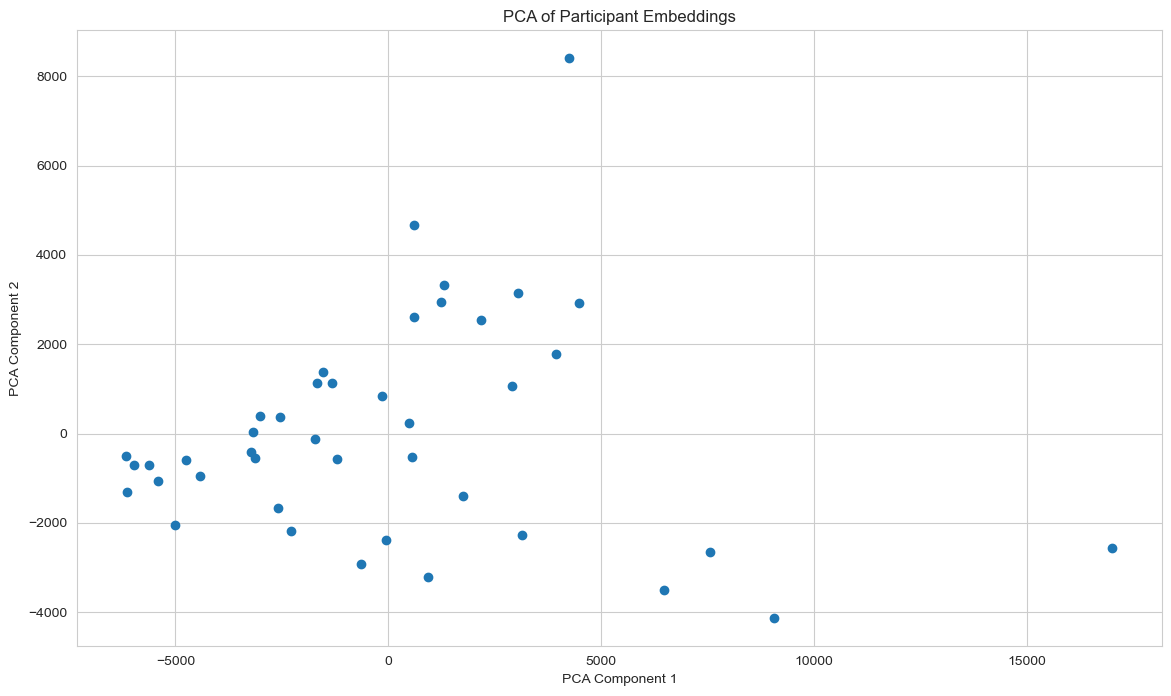

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(encoded_embeddings)

plt.figure(figsize=(14, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title('PCA of Participant Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


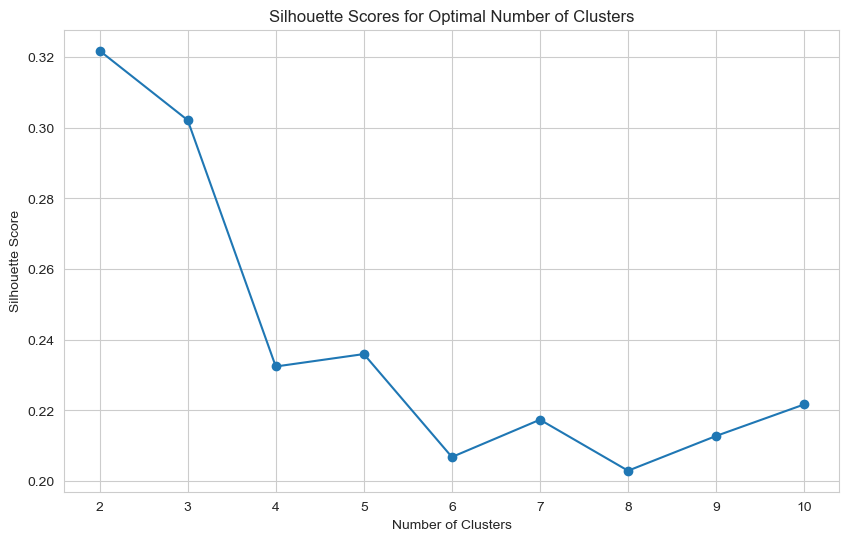

Optimal number of clusters: 2


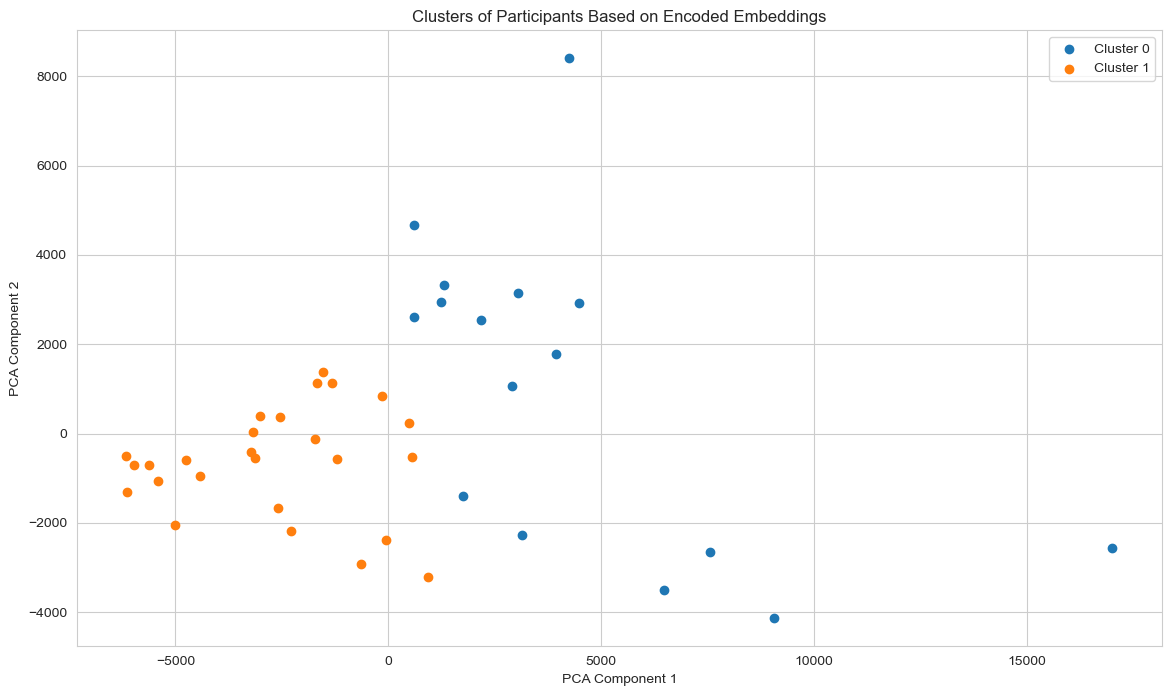

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using silhouette scores
silhouette_scores = []
range_n_clusters = list(range(2, 11))
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(encoded_embeddings)
    silhouette_avg = silhouette_score(encoded_embeddings, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the number of clusters with the highest silhouette score
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_n_clusters}')

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(encoded_embeddings)

# Plotting the clusters with PCA
plt.figure(figsize=(14, 8))
for i in range(optimal_n_clusters):
    plt.scatter(reduced_data[cluster_labels == i, 0], reduced_data[cluster_labels == i, 1], label=f'Cluster {i}')
plt.title('Clusters of Participants Based on Encoded Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


Epoch 1/50
3/3 [==============================] - 0s 32ms/step - loss: 1.2571 - val_loss: 2.0416
Epoch 2/50
3/3 [==============================] - 0s 8ms/step - loss: 1.2548 - val_loss: 2.0392
Epoch 3/50
3/3 [==============================] - 0s 9ms/step - loss: 1.2529 - val_loss: 2.0368
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 1.2510 - val_loss: 2.0345
Epoch 5/50
3/3 [==============================] - 0s 8ms/step - loss: 1.2491 - val_loss: 2.0323
Epoch 6/50
3/3 [==============================] - 0s 9ms/step - loss: 1.2472 - val_loss: 2.0301
Epoch 7/50
3/3 [==============================] - 0s 9ms/step - loss: 1.2454 - val_loss: 2.0279
Epoch 8/50
3/3 [==============================] - 0s 8ms/step - loss: 1.2437 - val_loss: 2.0257
Epoch 9/50
3/3 [==============================] - 0s 9ms/step - loss: 1.2420 - val_loss: 2.0234
Epoch 10/50
3/3 [==============================] - 0s 9ms/step - loss: 1.2402 - val_loss: 2.0212
Epoch 11/50
3/3 [=====================

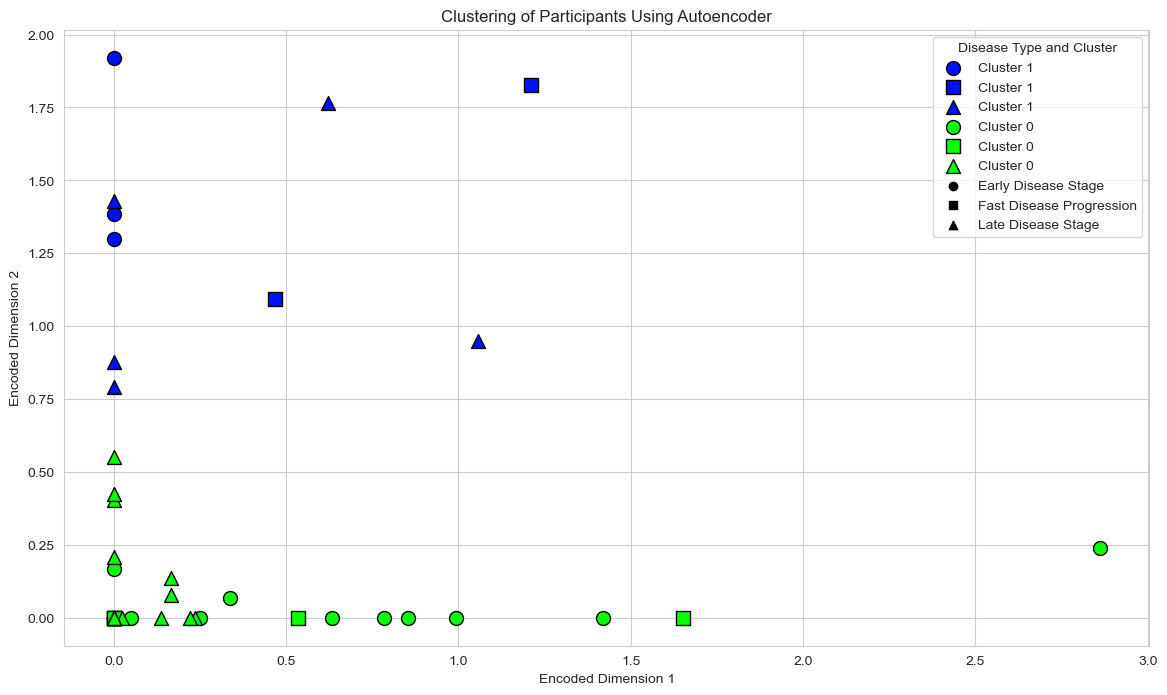

In [8]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

skip_participant = [4063, 2854]

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    if participant_id in skip_participant:
        continue
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Normalize the start date for each participant
all_data['date'] = all_data['time'].dt.date
all_data['days_from_start'] = all_data.groupby('participant_id')['date'].transform(lambda x: (x - x.min()).dt.days + 1)

# Remove rows where heartrate is NaN
all_data = all_data.dropna(subset=['heartrate'])

# Group by participant_id, disease_type, and days_from_start to sum steps and sleep per participant per day
participant_daily_data = all_data.groupby(['participant_id', 'disease_type', 'days_from_start']).agg({
    'steps': 'sum',
    'sleep': 'sum',
    'heartrate': 'mean'
}).reset_index()

# Group by participant_id and disease_type to get mean values for clustering
participant_features = participant_daily_data.groupby(['participant_id', 'disease_type']).agg({
    'steps': 'mean',
    'sleep': 'mean',
    'heartrate': 'mean'
}).reset_index()

# Prepare the feature set for the autoencoder
X = participant_features[['steps', 'sleep', 'heartrate']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 2  # Number of dimensions in the latent space

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, shuffle=True, validation_data=(X_test, X_test))

# Use the encoder to transform the data into its lower-dimensional representation
X_encoded = encoder.predict(X_scaled)

# Apply K-means clustering on the encoded data
kmeans = KMeans(n_clusters=2, random_state=42)
participant_features['cluster'] = kmeans.fit_predict(X_encoded)

# Prepare the data for plotting
plot_data = pd.DataFrame(X_encoded, columns=['dim1', 'dim2'])
plot_data['disease_type'] = participant_features['disease_type']
plot_data['cluster'] = participant_features['cluster']

# Define colors and markers for plotting
cluster_colors = sns.color_palette('hsv', len(plot_data['cluster'].unique()))
disease_markers = {'Early Disease Stage': 'o', 'Fast Disease Progression': 's', 'Late Disease Stage': '^'}

# Plotting the clusters with color and disease type with markers
plt.figure(figsize=(14, 8))
for cluster in plot_data['cluster'].unique():
    cluster_data = plot_data[plot_data['cluster'] == cluster]
    for disease, marker in disease_markers.items():
        disease_data = cluster_data[cluster_data['disease_type'] == disease]
        plt.scatter(disease_data['dim1'], disease_data['dim2'], 
                    color=cluster_colors[cluster], label=f'Cluster {cluster}', 
                    marker=marker, edgecolor='k', s=100)

# Create a legend for the disease types
for disease, marker in disease_markers.items():
    plt.scatter([], [], color='k', marker=marker, label=disease)

plt.title('Clustering of Participants Using Autoencoder')
plt.xlabel('Encoded Dimension 1')
plt.ylabel('Encoded Dimension 2')
plt.legend(title='Disease Type and Cluster')
plt.show()
